In [3]:
import os
print(os.getcwd())

/workspaces/EspecMiguel/Trabajo Final


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

In [5]:
df = pd.read_csv('../datos/Estudiantes.csv', sep = ';')
df.head()

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,Estrato 5,No,Si,Si,52.0,34,32,41,44,194
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Estrato 6,Si,Si,Si,47.0,47,46,52,58,252
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Estrato 6,Si,Si,Si,87.0,79,74,77,71,381
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Estrato 4,Si,Si,Si,81.0,81,66,75,73,372
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,Estrato 1,No,No,No,45.0,36,32,39,46,194


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110328 entries, 0 to 110327
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO                      110328 non-null  int64  
 1   ESTU_CONSECUTIVO             110328 non-null  object 
 2   COLE_AREA_UBICACION          110328 non-null  object 
 3   COLE_BILINGUE                92637 non-null   object 
 4   COLE_CALENDARIO              110328 non-null  object 
 5   COLE_DEPTO_UBICACION         110328 non-null  object 
 6   COLE_GENERO                  110328 non-null  object 
 7   COLE_JORNADA                 110328 non-null  object 
 8   COLE_NATURALEZA              110328 non-null  object 
 9   ESTU_COD_DEPTO_PRESENTACION  110328 non-null  int64  
 10  ESTU_DEPTO_PRESENTACION      110328 non-null  object 
 11  ESTU_GENERO                  110309 non-null  object 
 12  FAMI_EDUCACIONMADRE          103668 non-null  object 
 13 

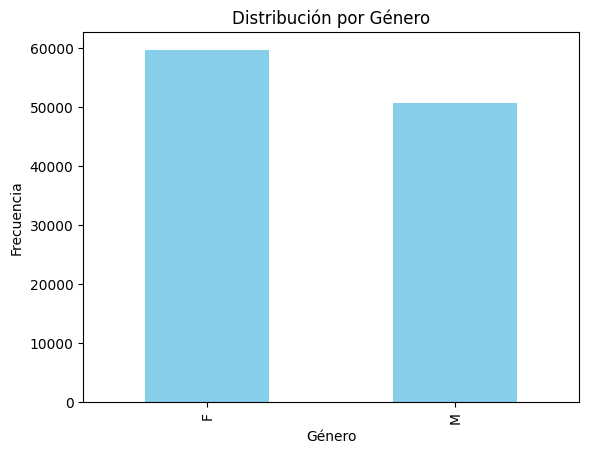

In [7]:
df['ESTU_GENERO'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

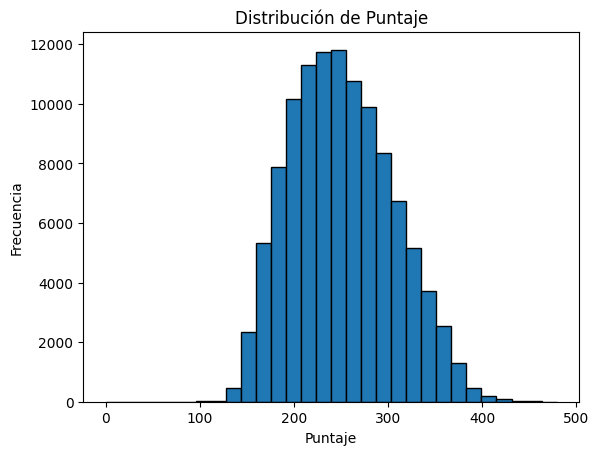

In [8]:
df['PUNT_GLOBAL'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución de Puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

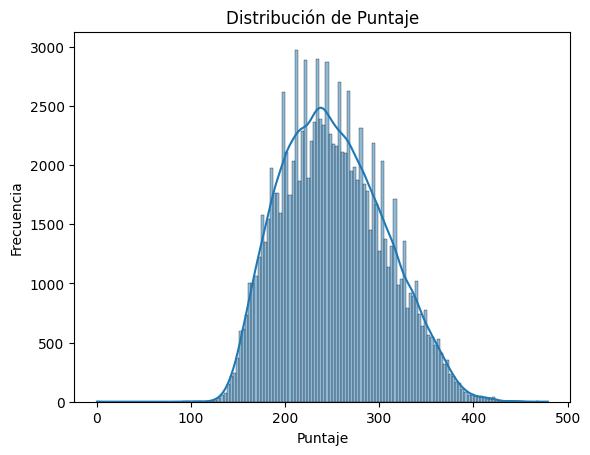

In [9]:
sns.histplot(df['PUNT_GLOBAL'], kde=True)
plt.title('Distribución de Puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

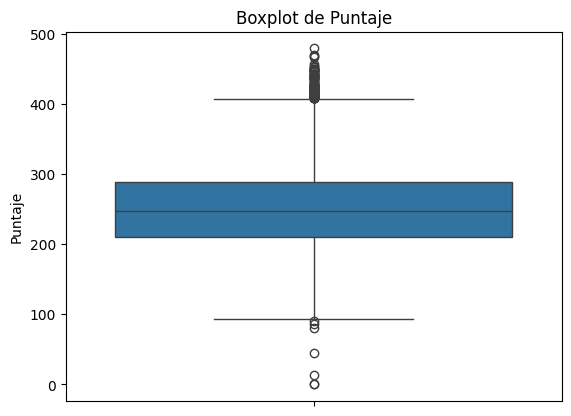

In [10]:
sns.boxplot(y=df['PUNT_GLOBAL'])
plt.title('Boxplot de Puntaje')
plt.ylabel('Puntaje')
plt.show()

<Axes: xlabel='COLE_CALENDARIO', ylabel='PUNT_GLOBAL'>

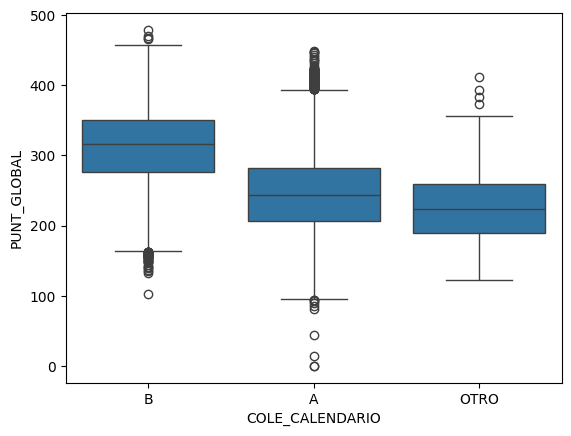

In [11]:
sns.boxplot(x='COLE_CALENDARIO', y='PUNT_GLOBAL', data=df)

<Axes: xlabel='ESTU_GENERO', ylabel='PUNT_GLOBAL'>

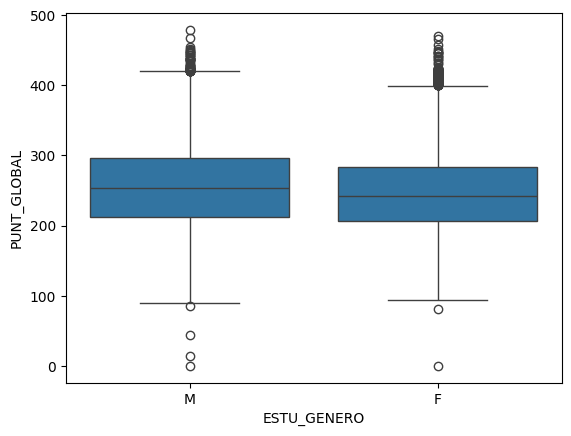

In [12]:
sns.boxplot(x='ESTU_GENERO', y='PUNT_GLOBAL', data=df)

<Axes: xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

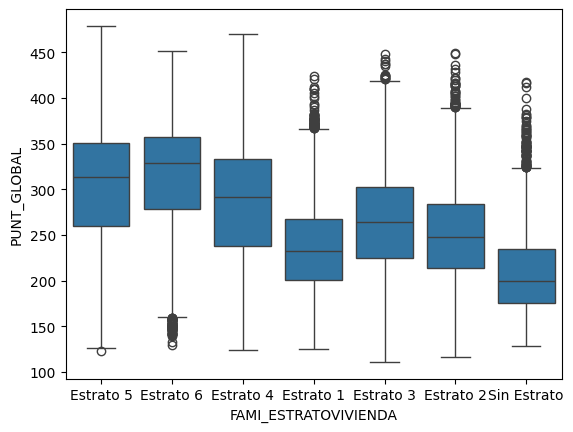

In [13]:
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=df)

<Axes: >

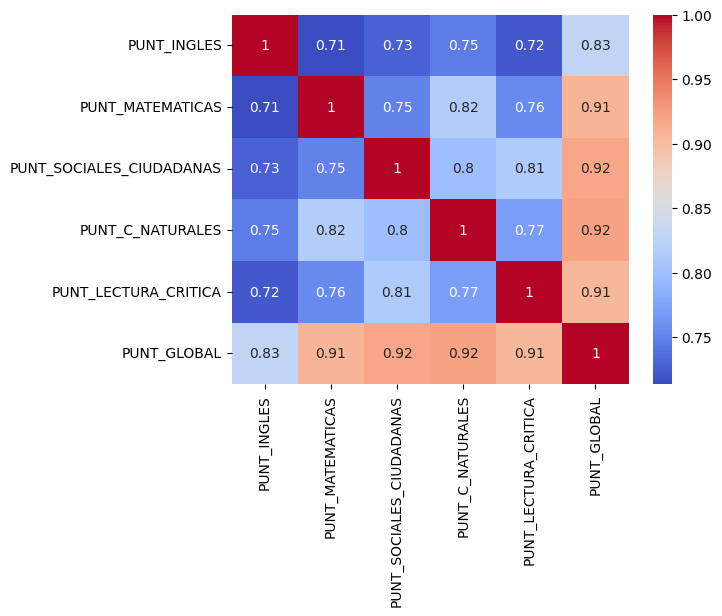

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

puntajes = df[['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']]
corr = puntajes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [15]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['PERIODO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']


In [16]:
df_filtrado = df[(df['PUNT_GLOBAL'] >= 110) & (df['PUNT_GLOBAL'] <= 420)].copy()

In [17]:
df_filtrado['Puntaje_Alto'] = (df_filtrado['PUNT_GLOBAL'] >= 280).astype(int)

df_filtrado.head()

,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Puntaje_Alto
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,No,Si,Si,52.0,34,32,41,44,194,0
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Si,Si,Si,47.0,47,46,52,58,252,0
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Si,Si,Si,87.0,79,74,77,71,381,1
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Si,Si,Si,81.0,81,66,75,73,372,1
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,No,No,No,45.0,36,32,39,46,194,0


In [20]:
df_filtrado['FAMI_ESTRATOVIVIENDA'] = (
    df_filtrado['FAMI_ESTRATOVIVIENDA']
    .fillna('0')
    .astype(str)
    .str.extract('(\d+)')
    .astype(float)
)
df_filtrado.head()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_66780/696196442.py:5: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


,PERIODO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,ESTU_COD_DEPTO_PRESENTACION,...,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Puntaje_Alto
0,20181,SB11201810028234,URBANO,N,B,VALLE,MIXTO,MAÑANA,NO OFICIAL,76,...,No,Si,Si,52.0,34,32,41,44,194,0
1,20181,SB11201810047396,URBANO,N,A,TOLIMA,MIXTO,SABATINA,NO OFICIAL,73,...,Si,Si,Si,47.0,47,46,52,58,252,0
2,20181,SB11201810016997,URBANO,S,B,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,11,...,Si,Si,Si,87.0,79,74,77,71,381,1
3,20181,SB11201810000913,URBANO,N,B,NARIÑO,MIXTO,COMPLETA,NO OFICIAL,52,...,Si,Si,Si,81.0,81,66,75,73,372,1
4,20181,SB11201810011839,URBANO,N,OTRO,CUNDINAMARCA,MIXTO,NOCHE,NO OFICIAL,25,...,No,No,No,45.0,36,32,39,46,194,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_before = df_filtrado[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']].dropna()
Xb = df_before
yb = df_filtrado.loc[df_before.index, 'Puntaje_Alto']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("Exactitud antes de la limpieza:", round(acc_before, 4))

Exactitud antes de la limpieza: 0.7197


Text(0.5, 0, 'Puntaje Global')

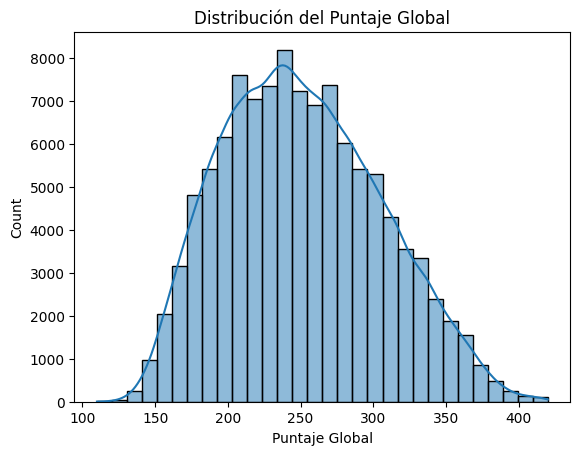

In [22]:
sns.histplot(df_filtrado['PUNT_GLOBAL'], kde=True, bins=30)
plt.title('Distribución del Puntaje Global')
plt.xlabel('Puntaje Global')

In [23]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['PERIODO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df_filtrado.copy()

# Imputación
imputer_Estrato = SimpleImputer(strategy='median')
df_clean['FAMI_ESTRATOVIVIENDA'] = imputer_Estrato.fit_transform(df_clean[['FAMI_ESTRATOVIVIENDA']])

imputer_DeptoCod = SimpleImputer(strategy='median')
df_clean['ESTU_COD_DEPTO_PRESENTACION'] = imputer_DeptoCod.fit_transform(df_clean[['ESTU_COD_DEPTO_PRESENTACION']])

imputer_Area = SimpleImputer(strategy='most_frequent')
df_clean['COLE_AREA_UBICACION'] = imputer_Area.fit_transform(df_clean[['COLE_AREA_UBICACION']]).ravel()

imputer_Bilingue = SimpleImputer(strategy='most_frequent')
df_clean['COLE_BILINGUE'] = imputer_Bilingue.fit_transform(df_clean[['COLE_BILINGUE']]).ravel()

imputer_CALENDARIO = SimpleImputer(strategy='most_frequent')
df_clean['COLE_CALENDARIO'] = imputer_CALENDARIO.fit_transform(df_clean[['COLE_CALENDARIO']]).ravel()
imputer_GENERO = SimpleImputer(strategy='most_frequent')
df_clean['COLE_GENERO'] = imputer_GENERO.fit_transform(df_clean[['COLE_GENERO']]).ravel()
imputer_JORNADA = SimpleImputer(strategy='most_frequent')
df_clean[ 'COLE_JORNADA' ] = imputer_JORNADA.fit_transform(df_clean[[ 'COLE_JORNADA' ]]).ravel()
imputer_NATURALEZA = SimpleImputer(strategy='most_frequent')
df_clean[ 'COLE_NATURALEZA' ] = imputer_NATURALEZA.fit_transform(df_clean[[ 'COLE_NATURALEZA' ]]).ravel()
imputer_EDUCACIONMADRE = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_EDUCACIONMADRE' ] = imputer_EDUCACIONMADRE.fit_transform(df_clean[[ 'FAMI_EDUCACIONMADRE' ]]).ravel()
imputer_EDUCACIONPADRE = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_EDUCACIONPADRE'] = imputer_EDUCACIONPADRE.fit_transform(df_clean[[ 'FAMI_EDUCACIONPADRE']]).ravel()
imputer_TIENEAUTOMOVIL = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENEAUTOMOVIL' ] = imputer_TIENEAUTOMOVIL.fit_transform(df_clean[[ 'FAMI_TIENEAUTOMOVIL' ]]).ravel()
imputer_TIENECOMPUTADOR = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENECOMPUTADOR' ] = imputer_TIENECOMPUTADOR.fit_transform(df_clean[[ 'FAMI_TIENECOMPUTADOR' ]]).ravel()
imputer_TIENEINTERNET = SimpleImputer(strategy='most_frequent')
df_clean[ 'FAMI_TIENEINTERNET'] = imputer_TIENEINTERNET.fit_transform(df_clean[[ 'FAMI_TIENEINTERNET']]).ravel()

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO','COLE_GENERO', 'COLE_JORNADA' , 'COLE_NATURALEZA' , 'FAMI_EDUCACIONMADRE' , 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL' , 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']] = scaler.fit_transform(df_clean[['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_DEPTO_PRESENTACION']])

In [25]:
print("Columnas en df_clean:", df_clean.columns.tolist())
df_clean.head()

Columnas en df_clean: ['PERIODO', 'ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA', 'PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL', 'Puntaje_Alto', 'COLE_AREA_UBICACION_URBANO', 'COLE_BILINGUE_S', 'COLE_CALENDARIO_B', 'COLE_CALENDARIO_OTRO', 'COLE_GENERO_MASCULINO', 'COLE_GENERO_MIXTO', 'COLE_JORNADA_MAÑANA', 'COLE_JORNADA_NOCHE', 'COLE_JORNADA_SABATINA', 'COLE_JORNADA_TARDE', 'COLE_JORNADA_UNICA', 'COLE_NATURALEZA_OFICIAL', 'FAMI_EDUCACIONMADRE_Educación profesional incompleta', 'FAMI_EDUCACIONMADRE_Ninguno', 'FAMI_EDUCACIONMADRE_No Aplica', 'FAMI_EDUCACIONMADRE_No sabe', 'FAMI_EDUCACIONMADRE_Postgrado', 'FAMI_EDUCACIONMADRE_Primaria completa', 'FAMI_EDUCACIONMADRE_Primaria incompleta', 'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta', 'FAMI_EDUCACIONMADRE

,PERIODO,ESTU_CONSECUTIVO,COLE_DEPTO_UBICACION,ESTU_COD_DEPTO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,...,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si
0,20181,SB11201810028234,VALLE,0.755319,VALLE,M,0.833333,52.0,34,32,...,False,False,False,False,False,True,False,False,True,True
1,20181,SB11201810047396,TOLIMA,0.723404,TOLIMA,F,1.000000,47.0,47,46,...,False,True,False,False,False,False,False,True,True,True
2,20181,SB11201810016997,BOGOTA,0.063830,BOGOTÁ,M,1.000000,87.0,79,74,...,False,False,False,False,False,False,False,True,True,True
3,20181,SB11201810000913,NARIÑO,0.500000,NARIÑO,F,0.666667,81.0,81,66,...,False,False,False,False,False,False,False,True,True,True
4,20181,SB11201810011839,CUNDINAMARCA,0.212766,CUNDINAMARCA,F,0.166667,45.0,36,32,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Eliminar columnas no deseadas
columnas_a_eliminar = [ 'PERIODO', 'ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION',
    'ESTU_DEPTO_PRESENTACION', 'PUNT_INGLES', 'PUNT_MATEMATICAS' , 'PUNT_SOCIALES_CIUDADANAS' ,
    'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL', 'Puntaje_Alto'
]

Xc = df_clean.drop(columns=columnas_a_eliminar)

# 1. Codificar variables categóricas
columnas_categoricas = Xc.select_dtypes(include=['object']).columns.tolist()
if columnas_categoricas:
    Xc = pd.get_dummies(Xc, columns=columnas_categoricas, drop_first=True)

# 2. Imputar valores faltantes (usando la media)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Xc_imputed = imputer.fit_transform(Xc)
Xc = pd.DataFrame(Xc_imputed, columns=Xc.columns, index=Xc.index)

# 3. Verificar que no hay NaN
print("Valores NaN restantes:", Xc.isnull().sum().sum())  # Debe ser 0

# 4. Separar y entrenar
yc = df_clean['Puntaje_Alto']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

model_after = LogisticRegression(max_iter=1000)
model_after.fit(Xc_train, yc_train)

yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

Valores NaN restantes: 0
✅ Exactitud después de la limpieza: 0.7723


Text(0.5, 0, 'Puntaje Global')

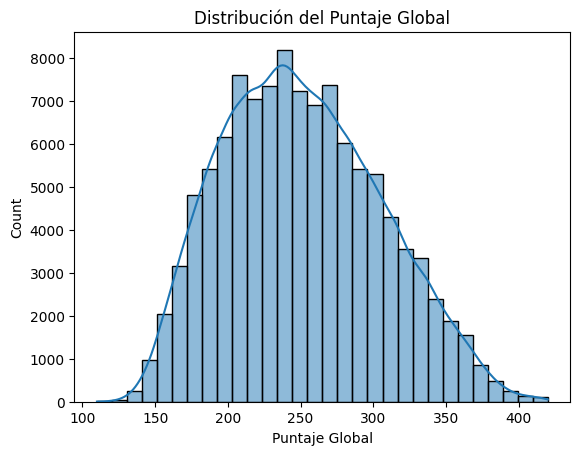

In [27]:
sns.histplot(df_clean['PUNT_GLOBAL'], kde=True, bins=30)
plt.title('Distribución del Puntaje Global')
plt.xlabel('Puntaje Global')

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(Xc_train)
X_test = scaler.transform(Xc_test)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, yc_train)
y_pred = knn.predict(X_test)

In [30]:
print("Exactitud:", round(accuracy_score(yc_test, y_pred), 4))
print(classification_report(yc_test, y_pred))

Exactitud: 0.7375
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     23058
           1       0.58      0.47      0.52     10010

    accuracy                           0.74     33068
   macro avg       0.68      0.66      0.67     33068
weighted avg       0.73      0.74      0.73     33068



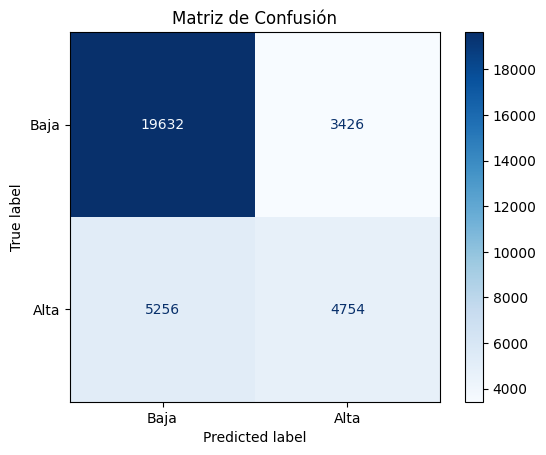

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(yc_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()

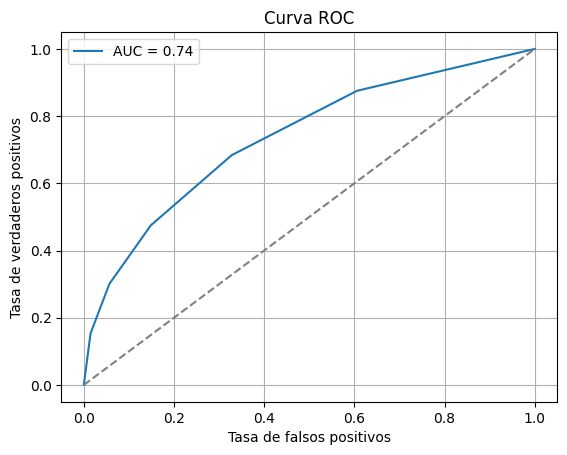

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(yc_test, y_prob)
auc = roc_auc_score(yc_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [34]:
model_corr = LogisticRegression(max_iter=200, class_weight='balanced')
model_corr.fit(X_train, yc_train)
y_pred_corr = model_corr.predict(X_test)
y_prob_corr = model_corr.predict_proba(X_test)[:, 1]

Reporte de clasificación (modelo corregido):
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     23058
           1       0.53      0.70      0.61     10010

    accuracy                           0.72     33068
   macro avg       0.69      0.72      0.70     33068
weighted avg       0.75      0.72      0.73     33068



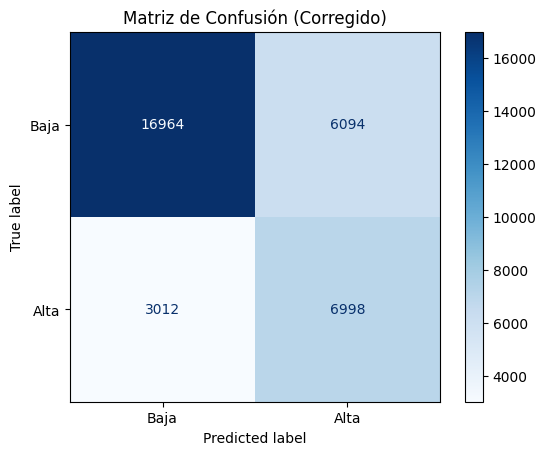

In [39]:
print("Reporte de clasificación (modelo corregido):")
print(classification_report(yc_test, y_pred_corr, zero_division=0))

cm = confusion_matrix(yc_test, y_pred_corr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

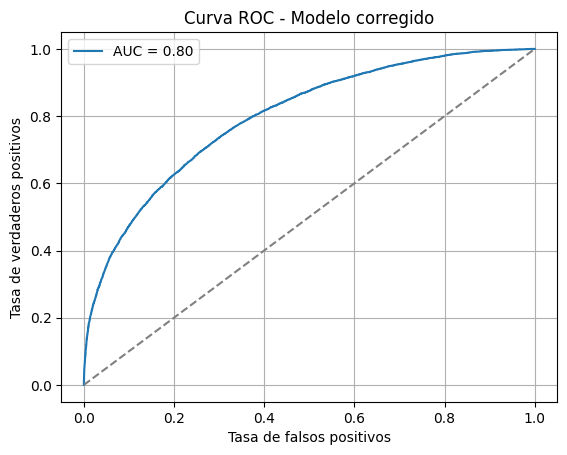

In [40]:
fpr, tpr, _ = roc_curve(yc_test, y_prob_corr)
auc = roc_auc_score(yc_test, y_prob_corr)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()

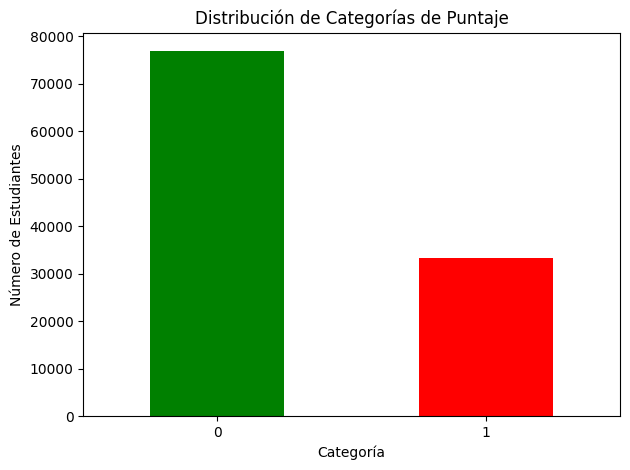

In [41]:
df_clean['Puntaje_Alto'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Categorías de Puntaje')
plt.xlabel('Categoría')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Selección de variables y limpieza
variables = [
    'COLE_GENERO_MASCULINO', 
    'COLE_GENERO_MIXTO', 
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENECOMPUTADOR_Si', 
    'FAMI_TIENEINTERNET_Si',
    'COLE_BILINGUE_S',
    'COLE_NATURALEZA_OFICIAL'
]

# Crear DataFrame y eliminar NA
df_modelo = df_clean[variables + ['Puntaje_Alto']].dropna()

# 2. Preparar características (X) y objetivo (y)
X = df_modelo[variables]
y = df_modelo['Puntaje_Alto']

# 3. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)

# 4. Entrenar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. Predecir
y_pred = modelo.predict(X_test)          # Predicciones clase
y_prob = modelo.predict_proba(X_test)   # Probabilidades

# 6. Evaluación
print("🔍 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\n✅ Precisión:", round(accuracy_score(y_test, y_pred), 4))

🔍 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     23058
           1       0.66      0.38      0.48     10010

    accuracy                           0.75     33068
   macro avg       0.72      0.65      0.66     33068
weighted avg       0.74      0.75      0.73     33068


✅ Precisión: 0.7522


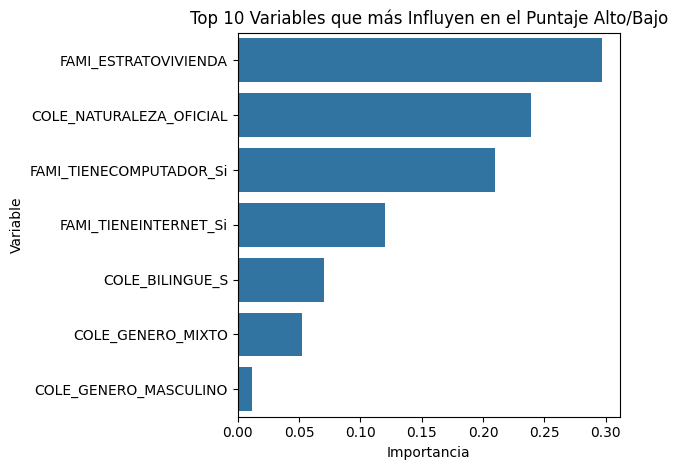

In [47]:
importancias = modelo.feature_importances_
columnas = X.columns

df_importancias = pd.DataFrame({'Variable': columnas, 'Importancia': importancias}).sort_values(by='Importancia', ascending=False)

sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(10))
plt.title('Top 10 Variables que más Influyen en el Puntaje Alto/Bajo')
plt.tight_layout()
plt.show()